In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.optimize import fsolve



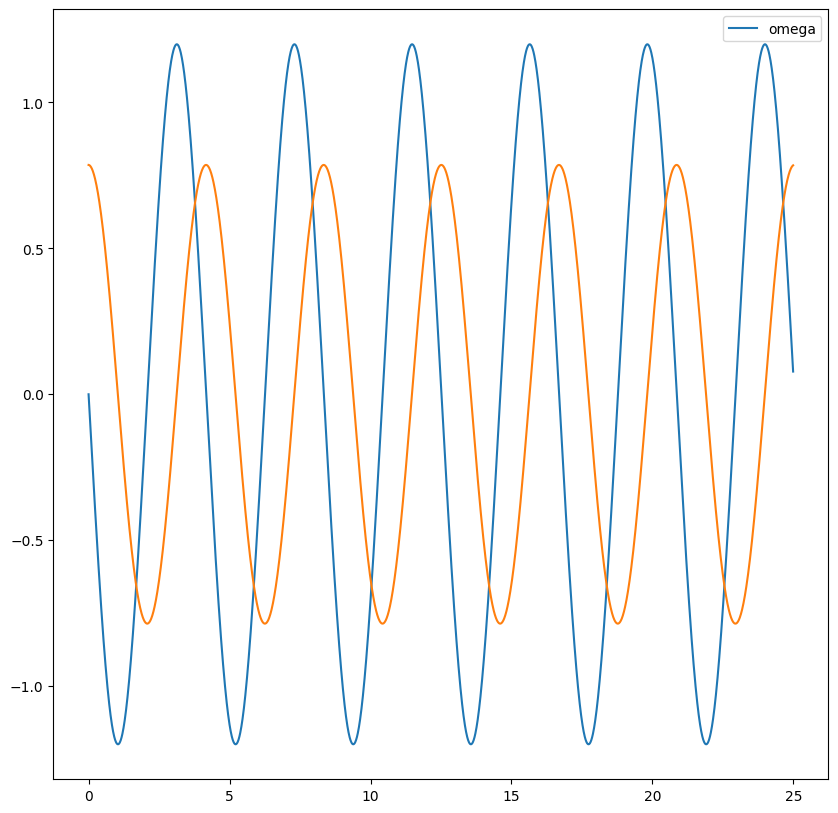

In [46]:
TIMESTEP = 0.01

def thetafunc(om_1, th_1, dt = TIMESTEP):
    """Defines the function for the theta equation.
    
    Arguments:
        om_1: angular velocity at time t_1
        dt: time step
        th_1: angle at time t_1
    """
    thetai = om_1*dt + th_1
    return thetai

def omfunc(om_1, th_1, params = 9.81/4,dt = TIMESTEP):
    """Defines the function for the angular velocity equation.
        om_1: angular velocity at time t_1
        dt: time step
        th_1: angle at time t_1
        params: vector of parameters:
        g = gravity
        l = length of pendulum
    """

    omi = om_1 - params*np.sin(th_1)*dt
    return omi
timepoint = np.arange(0, 25, TIMESTEP)
om = np.full_like(timepoint, -1)
theta = np.full_like(timepoint, -1)

theta[0] = np.pi/4
om[0] = 0
for i in np.arange(1, len(timepoint)):
    om[i] = omfunc(om[i-1], theta[i-1])
    theta[i] = thetafunc(om[i], theta[i-1])



plt.figure(figsize = (10, 10))
plt.plot(timepoint, om,label = "omega")
plt.plot(timepoint, theta )
plt.legend()
plt.show()
